In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [34]:
data_frame = pd.read_csv('data.csv')

In [35]:
data_frame.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [36]:
Y = data_frame['diagnosis']
Y = Y.map({'M': 1, 'B': 0}).astype(int)
data_frame['diagnosis'] = Y

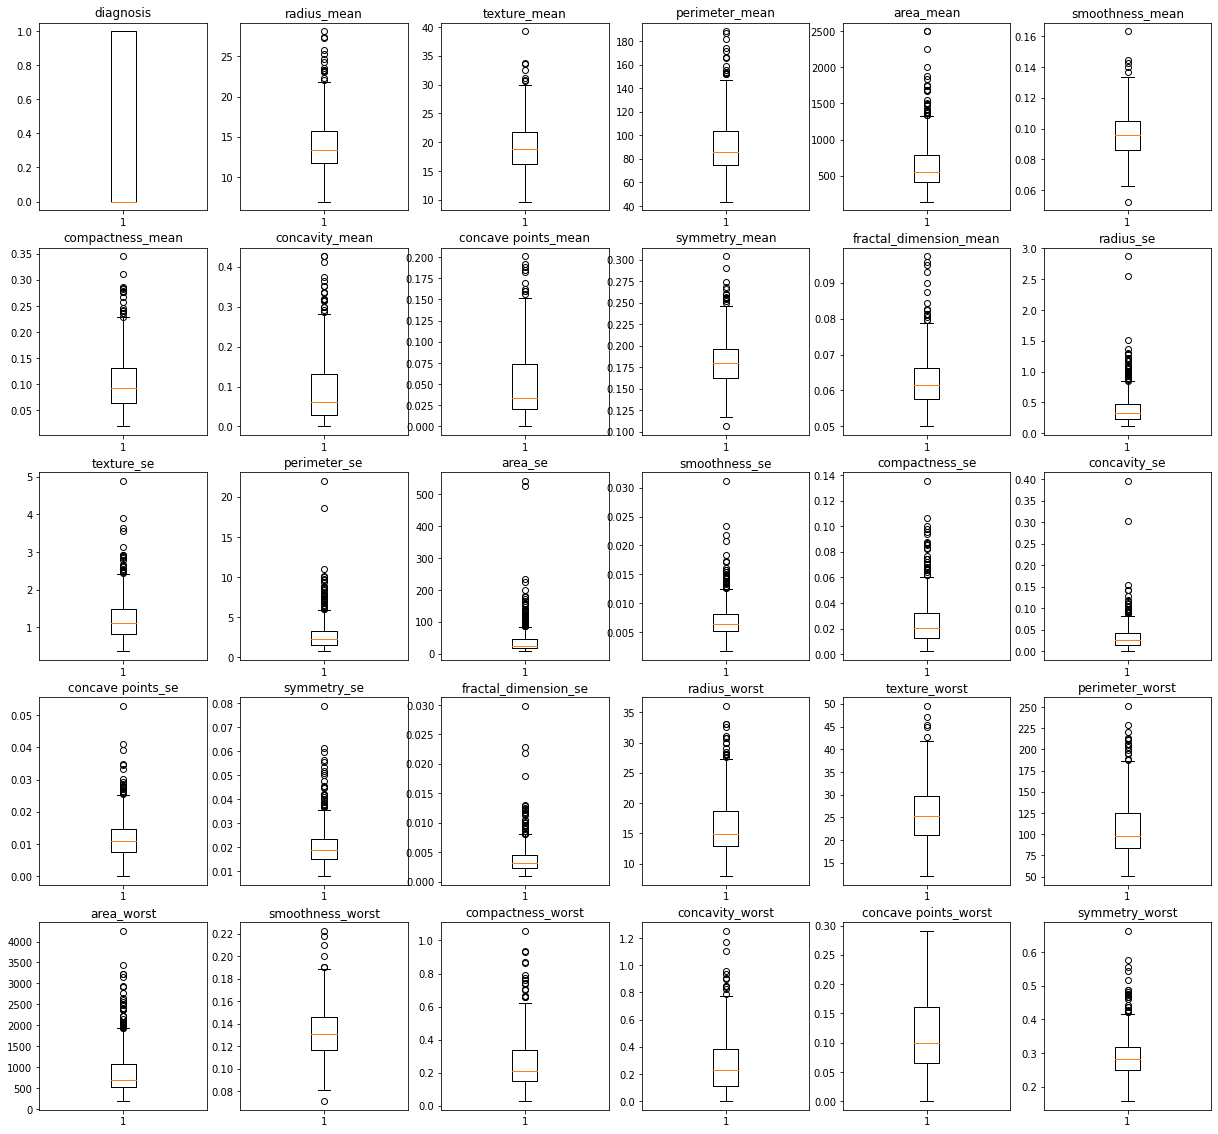

In [37]:
import seaborn as sns
plt.figure(figsize=(21,20))
for i in np.arange(1,31):
    temp = data_frame.iloc[:,i]
    plt.subplot(5,6,i)
    plt.boxplot(temp)
    plt.title(data_frame.columns[i])
plt.show()

<AxesSubplot:>

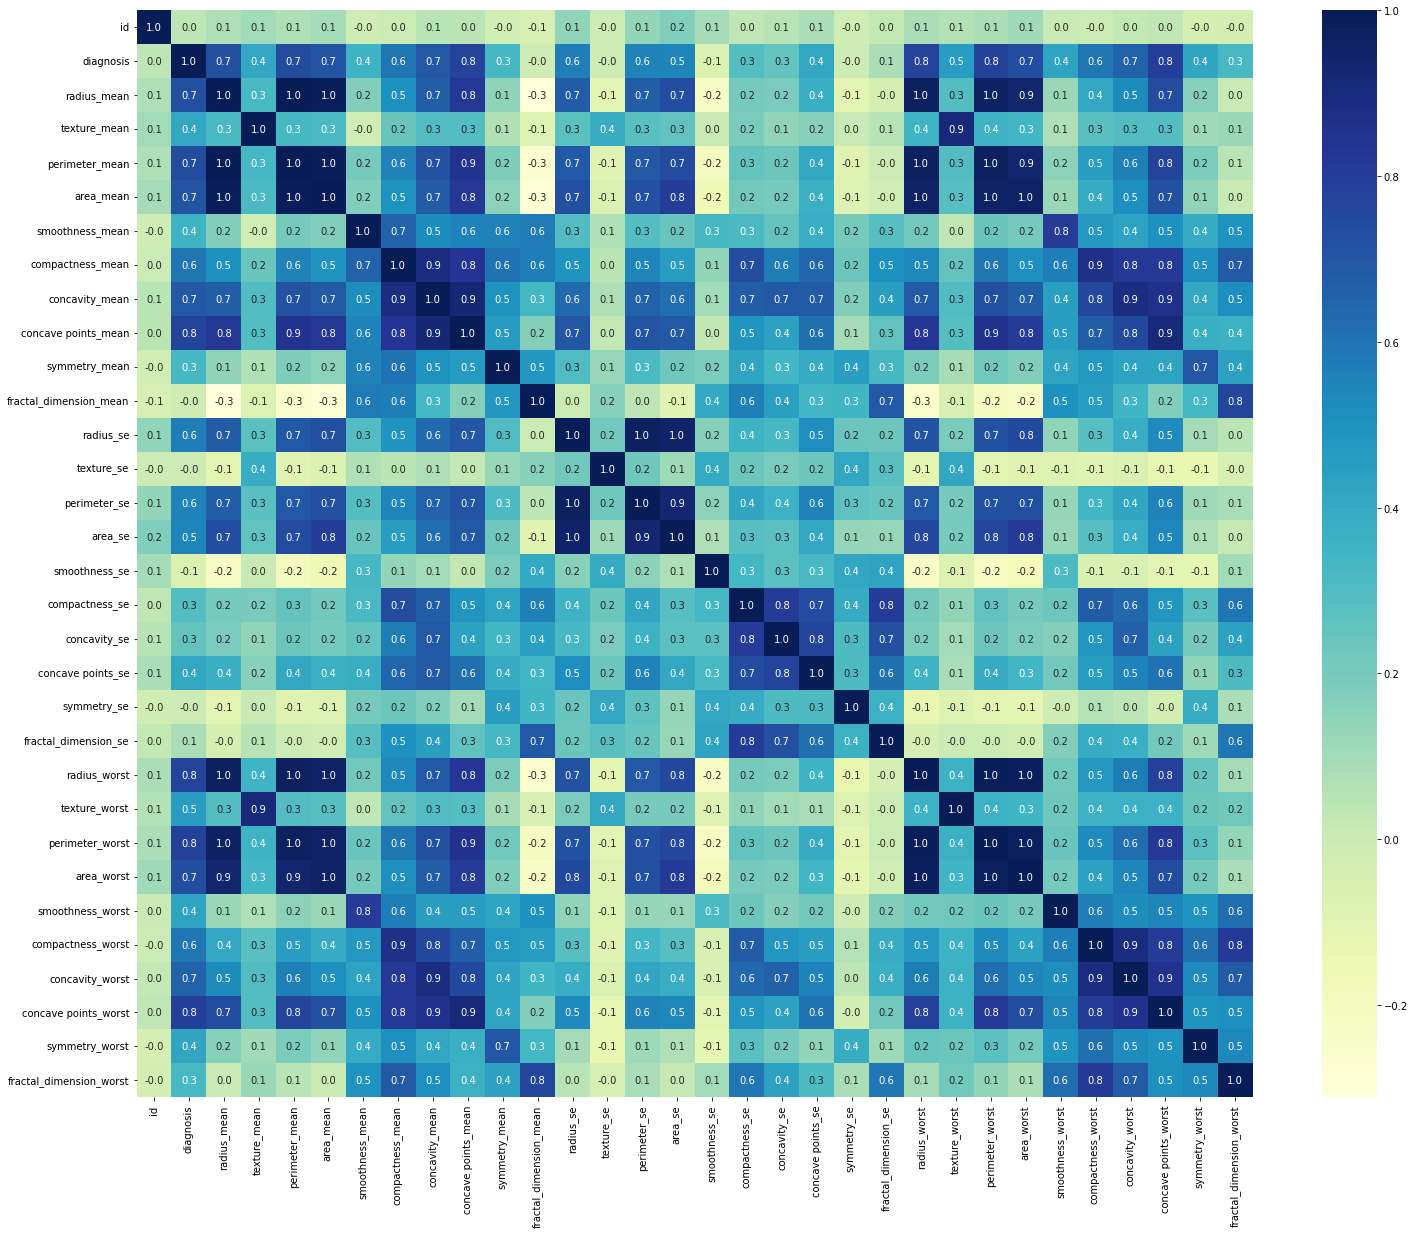

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,20))
corr = data_frame.corr()
# corr.style.background_gradient(cmap='YlGnBu')
import seaborn as sns
sns.heatmap(corr,cmap='YlGnBu',annot=True,fmt='.1f')

In [39]:
Y = data_frame['diagnosis']

In [40]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int32

In [41]:
data_frame = data_frame.drop(columns=['diagnosis','id'],axis=1)

In [42]:
X = data_frame
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()

In [45]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=35,stratify=Y)

In [46]:
X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.fit_transform(X_test)

In [47]:
X_test_std

array([[-0.00949179,  0.67781495,  0.20017636, ...,  1.66430266,
         1.15491273,  3.29175328],
       [-0.62122379, -1.1324046 , -0.55474297, ..., -0.80504877,
        -0.2683595 ,  1.05258711],
       [-0.52093985, -1.00505247, -0.55961656, ..., -0.8798776 ,
        -0.37645612, -0.30735204],
       ...,
       [-0.98224596,  1.04167817, -1.00408812, ..., -1.23277407,
         0.27539928, -0.497256  ],
       [ 0.23787525,  1.2190615 ,  0.30788273, ...,  0.11999571,
         0.48504122,  0.97889304],
       [ 1.10031709, -0.12495829,  1.16514749, ...,  2.1800981 ,
         0.35729066,  0.31621323]])

### Neural Network 

In [48]:
import tensorflow as tf
from tensorflow import keras
tf.random.set_seed(3)

Setting the layers of NN

In [49]:
model = keras.Sequential([
                        keras.layers.Flatten(input_shape=(30,)),
                        keras.layers.Dense(20,activation='tanh'),
                        keras.layers.Dense(30,activation='relu'),
                        keras.layers.Dense(2,activation='sigmoid')
                        ])

In [50]:
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
            )

Training the NN

In [51]:
history = model.fit(X_train_std,Y_train,validation_split=0.25,epochs=40)

Epoch 1/40
11/11 [==============================] - 0s 18ms/step - loss: 0.6071 - accuracy: 0.7038 - val_loss: 0.4659 - val_accuracy: 0.8509
Epoch 2/40
11/11 [==============================] - 0s 9ms/step - loss: 0.3954 - accuracy: 0.9179 - val_loss: 0.3185 - val_accuracy: 0.9298
Epoch 3/40
11/11 [==============================] - 0s 8ms/step - loss: 0.2773 - accuracy: 0.9384 - val_loss: 0.2350 - val_accuracy: 0.9386
Epoch 4/40
11/11 [==============================] - 0s 8ms/step - loss: 0.2090 - accuracy: 0.9472 - val_loss: 0.1834 - val_accuracy: 0.9386
Epoch 5/40
11/11 [==============================] - 0s 8ms/step - loss: 0.1656 - accuracy: 0.9619 - val_loss: 0.1501 - val_accuracy: 0.9649
Epoch 6/40
11/11 [==============================] - 0s 7ms/step - loss: 0.1375 - accuracy: 0.9707 - val_loss: 0.1266 - val_accuracy: 0.9649
Epoch 7/40
11/11 [==============================] - 0s 8ms/step - loss: 0.1171 - accuracy: 0.9736 - val_loss: 0.1104 - val_accuracy: 0.9737
Epoch 8/40
11/11 [=

Visualizing Acc and Loss

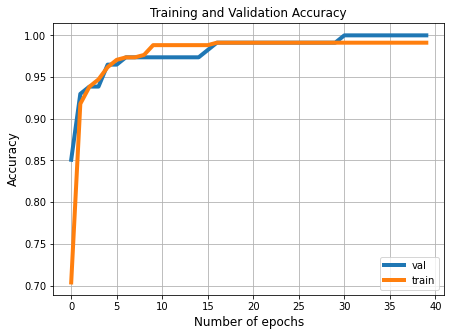

In [52]:
plt.figure(figsize=(7,5))
plt.plot(history.history['val_accuracy'],linewidth = 4)
plt.plot(history.history['accuracy'],linewidth = 4)

plt.title("Training and Validation Accuracy",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['val','train'],loc = 'lower right')
plt.grid()

plt.show()

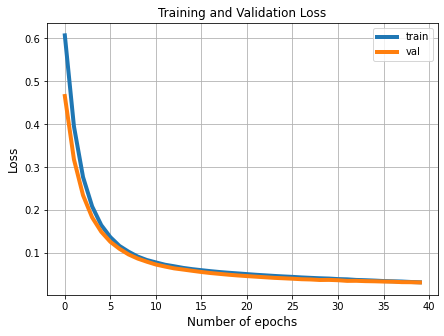

In [53]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],linewidth = 4)
plt.plot(history.history['val_loss'],linewidth = 4)

plt.title("Training and Validation Loss",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['train','val'],loc = 'upper right')
plt.grid()
plt.show()


In [54]:
loss,accuracy = model.evaluate(X_test_std,Y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.1202 - accuracy: 0.9561


In [55]:
X_test_std[0]

array([-0.00949179,  0.67781495,  0.20017636, -0.1225708 ,  1.37603407,
        2.50485899,  1.74545609,  0.99058389,  1.11856944,  1.86799457,
       -0.82421278, -0.13671264, -0.45227502, -0.53214944, -0.26685881,
        1.68593907,  0.63065601,  0.77833075, -0.20227101,  1.35904463,
       -0.17105496,  0.9577164 ,  0.18485027, -0.24562784,  1.63479742,
        3.26917334,  1.9003118 ,  1.66430266,  1.15491273,  3.29175328])

In [56]:
test_pred = model.predict(X_test_std)
test_pred[0]

array([0.10764289, 0.9026085 ], dtype=float32)

In [57]:
prediction_labels = [np.argmax(i) for i in test_pred]

In [58]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [59]:
scaler = StandardScaler()

In [60]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
14,13.73,22.61,93.60,578.3,0.11310,0.22930,0.21280,0.08025,0.2069,0.07682,...,15.03,32.01,108.80,697.7,0.1651,0.77250,0.69430,0.22080,0.3596,0.14310
145,11.90,14.65,78.11,432.8,0.11520,0.12960,0.03710,0.03003,0.1995,0.07839,...,13.15,16.51,86.26,509.6,0.1424,0.25170,0.09420,0.06042,0.2727,0.10360
324,12.20,15.21,78.01,457.9,0.08673,0.06545,0.01994,0.01692,0.1638,0.06129,...,13.75,21.38,91.11,583.1,0.1256,0.19280,0.11670,0.05556,0.2661,0.07961
362,12.76,18.84,81.87,496.6,0.09676,0.07952,0.02688,0.01781,0.1759,0.06183,...,13.75,25.99,87.82,579.7,0.1298,0.18390,0.12550,0.08312,0.2744,0.07238
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.18660,0.24160,0.18600,0.2750,0.08902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,12.04,28.14,76.85,449.9,0.08752,0.06000,0.02367,0.02377,0.1854,0.05698,...,13.60,33.33,87.24,567.6,0.1041,0.09726,0.05524,0.05547,0.2404,0.06639
519,12.75,16.70,82.51,493.8,0.11250,0.11170,0.03880,0.02995,0.2120,0.06623,...,14.45,21.74,93.63,624.1,0.1475,0.19790,0.14230,0.08045,0.3071,0.08557
549,10.82,24.21,68.89,361.6,0.08192,0.06602,0.01548,0.00816,0.1976,0.06328,...,13.03,31.45,83.90,505.6,0.1204,0.16330,0.06194,0.03264,0.3059,0.07626
541,14.47,24.99,95.81,656.4,0.08837,0.12300,0.10090,0.03890,0.1872,0.06341,...,16.22,31.73,113.50,808.9,0.1340,0.42020,0.40400,0.12050,0.3187,0.10230


In [61]:
X_test_std[1]

array([-0.62122379, -1.1324046 , -0.55474297, -0.64456984,  1.54642094,
        0.53703659, -0.65018834, -0.45848917,  0.82354828,  2.08847312,
        0.10677274, -1.14816508,  0.24996616, -0.33524282,  1.12884331,
        1.07377068, -0.14269807, -0.12612833,  1.15176423,  1.80517521,
       -0.62889915, -1.58107904, -0.61997523, -0.65388239,  0.52072346,
       -0.00779734, -0.8022975 , -0.80504877, -0.2683595 ,  1.05258711])

In [62]:
X_test_std[0]

array([-0.00949179,  0.67781495,  0.20017636, -0.1225708 ,  1.37603407,
        2.50485899,  1.74545609,  0.99058389,  1.11856944,  1.86799457,
       -0.82421278, -0.13671264, -0.45227502, -0.53214944, -0.26685881,
        1.68593907,  0.63065601,  0.77833075, -0.20227101,  1.35904463,
       -0.17105496,  0.9577164 ,  0.18485027, -0.24562784,  1.63479742,
        3.26917334,  1.9003118 ,  1.66430266,  1.15491273,  3.29175328])

In [63]:
test_input = (-0.62122379, -1.1324046 , -0.55474297, -0.64456984,  1.54642094,
        0.53703659, -0.65018834, -0.45848917,  0.82354828,  2.08847312,
        0.10677274, -1.14816508,  0.24996616, -0.33524282,  1.12884331,
        1.07377068, -0.14269807, -0.12612833,  1.15176423,  1.80517521,
       -0.62889915, -1.58107904, -0.61997523, -0.65388239,  0.52072346,
       -0.00779734, -0.8022975 , -0.80504877, -0.2683595 ,  1.05258711)
test_input = np.asarray(test_input)
test_input_new = test_input.reshape(1,-1)

prediction = model.predict(test_input_new)
print(prediction)

prediction_labels = [np.argmax(prediction)]
print(prediction_labels)

if prediction_labels[0] == 1:
    print("The Tumour is Malignant")
else:
    print("The Tumour is Benign")

[[0.9874286  0.02073603]]
[0]
The Tumour is Benign


In [64]:
test_input = (-0.00949179,  0.67781495,  0.20017636, -0.1225708 ,  1.37603407,
        2.50485899,  1.74545609,  0.99058389,  1.11856944,  1.86799457,
       -0.82421278, -0.13671264, -0.45227502, -0.53214944, -0.26685881,
        1.68593907,  0.63065601,  0.77833075, -0.20227101,  1.35904463,
       -0.17105496,  0.9577164 ,  0.18485027, -0.24562784,  1.63479742,
        3.26917334,  1.9003118 ,  1.66430266,  1.15491273,  3.29175328)
test_input = np.asarray(test_input)
test_input_new = test_input.reshape(1,-1)

prediction = model.predict(test_input_new)
print(prediction)

prediction_labels = [np.argmax(prediction)]
print(prediction_labels)

if prediction_labels[0] == 1:
    print("The Tumour is Malignant")
else:
    print("The Tumour is Benign")

[[0.10764289 0.90260863]]
[1]
The Tumour is Malignant
